In [1]:
#####################################################################

## Assignment on Multiple Linear Regression

# By Sarang Thakare
# Assignment problem on Toyota Price

# Consider only the below columns and prepare a prediction model for predicting Price.

# Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

#########################################################################

In [2]:
# Importing Libraries and Loading Data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm
import statsmodels.formula.api as smf # for regression model
import seaborn as sns
import scipy.stats as st

from sklearn.model_selection import train_test_split
import pylab
import math as math          
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from scipy.stats import shapiro

RMSE for the original model 1338.2584236201512
Linear model of price with age     R2 adj     0.7682494010072765
Linear model of price with km     R2 adj     0.3243837764559706
Linear model of price with hp     R2 adj     0.09859043279951563
Linear model of price with cc     R2 adj     0.015288018773443546
Linear model of price with doors     R2 adj     0.03367216023962727
Linear model of price with gears     R2 adj     0.003287523631096634
Linear model of price with q_tax     R2 adj     0.04738344138234618
Linear model of price with weight     R2 adj     0.33732884529812757
RMSE for the model after remving influencing observations 1204.7126830098227
RMSE for the model after remving influencing observations 1446.7680152915673
                      0             1
Intercept -18966.261766 -13396.767034
age         -115.123769   -105.536607
km            -0.020012     -0.015377
hp            28.982712     39.623648
cc            -4.270004     -3.105199
doors       -216.425635    -71.661240

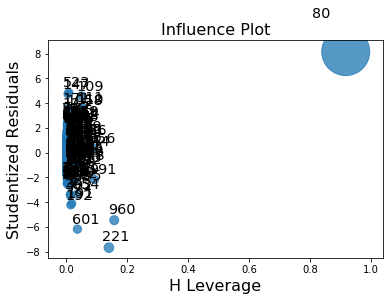

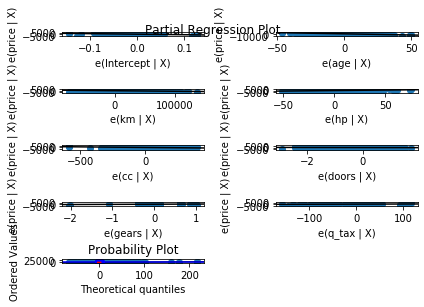

In [52]:
# Reading data from excel
toyota_data = pd.read_excel("C:\\Users\\320101002\\Documents\\Data_Science\\5_Multipal_Linear_Regression\\Data\\ToyotaCorolla.xlsx")
toyota_data.head()
toyota_data.shape # Data of 1436 observations and 38 features


#########################################################################

# Data Cleaning

toyota_data.isnull().sum() # To check if any null values exists
# No null values
########################################################################
# Creating dataframe with only features mentioned in assignment problem
toyota_data_n = toyota_data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']].copy()
toyota_data_n.head()
toyota_data_n.shape

# Renaming the column names with shorter names

toyota_data_n.columns = ['price','age','km','hp','cc','doors','gears','q_tax','weight']
toyota_data_n.corr()

# Scatter plot between the variables along with histograms
###sns.pairplot(toyota_data_n) # Too many observations and features

# Weight and price                           
# preparing model considering all the variables 

########################################################################
         
# Preparing model  
y = toyota_data_n['price']
x = toyota_data_n.drop('price',axis=1)

mlr_all = smf.ols('y~x',data=toyota_data_n).fit() # regression model


# Getting coefficients of variables               
mlr_all.params
mlr_all.summary()
# R2 Adjusted = 0.863

# RMSE value  
mlr_all_pred = mlr_all.predict(toyota_data_n)
mlr_all_resid  = mlr_all_pred - toyota_data_n.price
mlr_all_rmse = np.sqrt(np.mean(mlr_all_resid*mlr_all_resid))
print("RMSE for the original model",mlr_all_rmse)
# RMSE = 1338

########################################################################

# Checking effect of each individual parameter

x.head()
x.columns

list = ['age', 'km', 'hp', 'cc', 'doors', 'gears', 'q_tax', 'weight']

for i in range (1,9):  # 0th column is price which is y
    y = toyota_data_n['price']
    xi=toyota_data_n.iloc[:,i]
    mlr_xi= smf.ols('y~xi',data=toyota_data_n).fit()    
    mlr_xi_pred = mlr_xi.predict(toyota_data_n)
    mlr_xi_resid  = mlr_xi_pred - toyota_data_n.price
    mlr_xi_rmse = np.sqrt(np.mean(mlr_xi_resid*mlr_xi_resid))
    print("Linear model of price with",xi.name,"    R2 adj    ",mlr_xi.rsquared_adj)
    
    #print("R2 adj                ",mlr_xi.rsquared_adj)
#  fit_d[xi] = mlr_xi_rmse

# R2 Adjusted values with simple linear regression of each x feature with Price
# price with age       R2 adj     0.7682494010072765
# price with hp        R2 adj     0.09859043279951563
# price with cc        R2 adj     0.015288018773443546
# price with doors     R2 adj     0.03367216023962727
# price with gears     R2 adj     0.003287523631096634
# price with q_tax     R2 adj     0.04738344138234618
# price with weight    R2 adj     0.33732884529812757

########################################################################


# Checking whether data has any influential values 
# influence index plots

sm.graphics.influence_plot(mlr_all)

# index 80, 221, 960 and 601 show high influence so we can exclude that entire row

toyota_data_ni=toyota_data_n.drop(toyota_data_n.index[[80,221,601,960]],axis=0)

mlr_all_ni = smf.ols('price~age+km+hp+cc+doors+gears+q_tax+weight',data=toyota_data_ni).fit() # regression model

# Getting coefficients of variables               
mlr_all_ni.params
mlr_all_ni.summary()
# R2 Adjusted = 0.889 Improved

# RMSE value  
mlr_all_ni_pred = mlr_all_ni.predict(toyota_data_ni)
mlr_all_ni_resid  = mlr_all_ni_pred - toyota_data_ni.price
mlr_all_ni_rmse = np.sqrt(np.mean(mlr_all_ni_resid*mlr_all_ni_resid))
print("RMSE for the model after remving influencing observations",mlr_all_ni_rmse)
# RMSE = 1204 Which has been improved over original model

#########################################################################

# Checking Collinarity with Variance Influencing plot


x_ni = toyota_data_ni.drop(['price'],axis = 1)
x_ni.head()
x_ni = x_ni._get_numeric_data() 
x_ni.head()
y_ni = toyota_data_ni['price']

features = "+".join(x_ni)
features
# get y and x dataframes based on this regression:
y_ni, x_ni = dmatrices('y_ni ~' + features, x_ni, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_ni.values, i) for i in range(x_ni.shape[1])]
vif["features"] = x_ni.columns
vif.round(3)

# Summary of VIF Factors
#   VIF Factor   features
# 1       2.025        age
# 2       1.922         km
# 3       1.620         hp
# 4       3.019         cc
# 5       1.210      doors
# 6       1.101      gears
# 7       3.068      q_tax
# 8       3.912     weight

# All features have low VIF hence do not
# indicate no collinearity

########################################################################

# Let us see how significant each feature is on the price. 
# We will look at the P value in the summary table, 

# And then try dropping features which are not significant 
# We will use modified data frame where we have dropped influencing observation 

# Model with all features               
mlr_all_ni.params
mlr_all_ni.summary()

# For all features the P values are less than 0.05
# Statistically all features have moderate or high effect on the price

# One may think of reducing features from coefficent values
# However, I think coefficent multiplied with the feature value shou;d be considered
# Another way is by trial and error based on p value and VIF
# weight has VIF of 3,91, let us drop weight 

mlr_all_ni_wt = smf.ols('price~age+km+hp+cc+doors+gears+q_tax',data=toyota_data_ni).fit() # regression model
mlr_all_ni_wt.summary()
# R2 Adjusted = 0.840 Improved

# RMSE value  
mlr_all_ni_wt_pred = mlr_all_ni_wt.predict(toyota_data_ni)
mlr_all_ni_wt_resid  = mlr_all_ni_wt_pred - toyota_data_ni.price
mlr_all_ni_wt_rmse = np.sqrt(np.mean(mlr_all_ni_wt_resid*mlr_all_ni_wt_resid))
print("RMSE for the model after remving influencing observations",mlr_all_ni_wt_rmse)
# RMSE = 1447 Which us slightly higher than earlier model

# Let us switch back to full model
final_mlr = smf.ols('price~age+km+hp+cc+doors+gears+q_tax+weight',data=toyota_data_ni).fit() # regression model

######################################################################

# Added varible plot 
sm.graphics.plot_partregress_grid(final_mlr)
price_pred_final = final_mlr.predict(toyota_data_ni)

# Observed values VS Fitted values
plt.scatter(toyota_data_ni.price,price_pred_final,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")

# Residuals VS Fitted Values 

plt.scatter(price_pred_final,final_mlr.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")
# Residuals dp not show any trend which is good

########    Normality plot for residuals ######
# histogram
plt.hist(final_mlr.resid_pearson) # Checking the standardized residuals are normally distributed

# QQ plot for residuals 

# Checking Residuals are normally distributed
st.probplot(final_mlr.resid_pearson, dist="norm", plot=pylab)

# Confidence values 99%
print(final_mlr.conf_int(0.05)) # 95% confidence level

############################################################


############################################################

### Splitting the data into train and test data 

toyota_train,toyota_test  = train_test_split(toyota_data_ni,test_size = 0.2) # 20% size

# preparing the model on train data 

toyota_model_train = smf.ols('price~age+km+hp+cc+doors+gears+q_tax+weight',data=toyota_train).fit()

# train_data prediction
toyota_train_pred = toyota_model_train.predict(toyota_train)

# train residual values 
toyota_train_resid  = toyota_train_pred - toyota_train.price

# RMSE value for train data 
toyota_train_rmse = np.sqrt(np.mean(toyota_train_resid*toyota_train_resid))

# prediction on test data set 
toyota_test_pred = toyota_model_train.predict(toyota_test)

# test residual values 
toyota_test_resid  = toyota_test_pred - toyota_test.price

# RMSE value for test data 
toyota_test_rmse = np.sqrt(np.mean(toyota_test_resid*toyota_test_resid))

print("RMSE for the test data",toyota_test_rmse)
# RMSE 1249
############################################################



